### LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable

### READ THE DATASET :

In [2]:
df = pd.read_csv('laptops.csv', encoding='utf-8', header=0)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1699.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,NaN,14.0,No,909.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,NaN,15.6,No,809.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,NaN,15.6,No,519.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1149.00


In [4]:
df.tail(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2150,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,15.6,No,3299.99
2151,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,15.6,No,3399.99
2152,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3060,15.6,No,1232.74
2153,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3070,15.6,No,1583.39
2154,Razer Blade 17 4K 144Hz Intel Core i9-12900H/3...,Refurbished,Razer,Blade,Intel Core i9,32,1000,SSD,RTX 3080,17.3,No,4699.99
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99
2159,Razer Book FHD+ Intel Evo Core i7-1165G7/16GB/...,Refurbished,Razer,Book,Intel Evo Core i7,16,256,SSD,NaN,13.4,Yes,1699.99


### EDA ON DATASET :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [6]:
df.isnull().sum()

,0
Laptop,0
Status,0
Brand,0
Model,0
CPU,0
RAM,0
Storage,0
Storage type,42
GPU,1371
Screen,4


In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(2160, 12)

In [9]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [10]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [11]:
df.nunique()

,0
Laptop,2160
Status,2
Brand,27
Model,121
CPU,28
RAM,9
Storage,12
Storage type,2
GPU,44
Screen,29


In [12]:
df.dtypes

,0
Laptop,object
Status,object
Brand,object
Model,object
CPU,object
RAM,int64
Storage,int64
Storage type,object
GPU,object
Screen,float64


## Preparing the dataset

### Normalize the names of the columns

In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

### Only use the following columns

In [14]:
new_col = df[['ram', 'storage', 'screen', 'final_price']]
new_col

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


### Eda on final_price variable with visualize of distribution

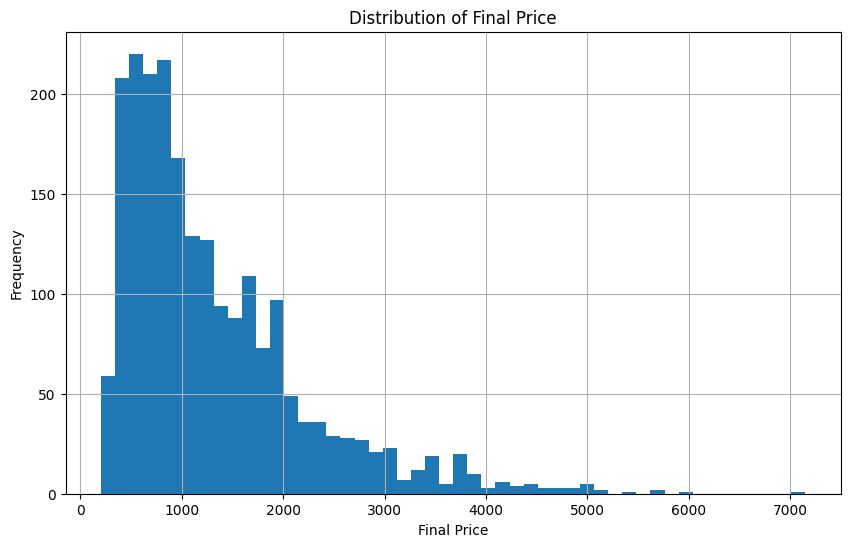

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
new_col['final_price'].hist(bins=50)
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

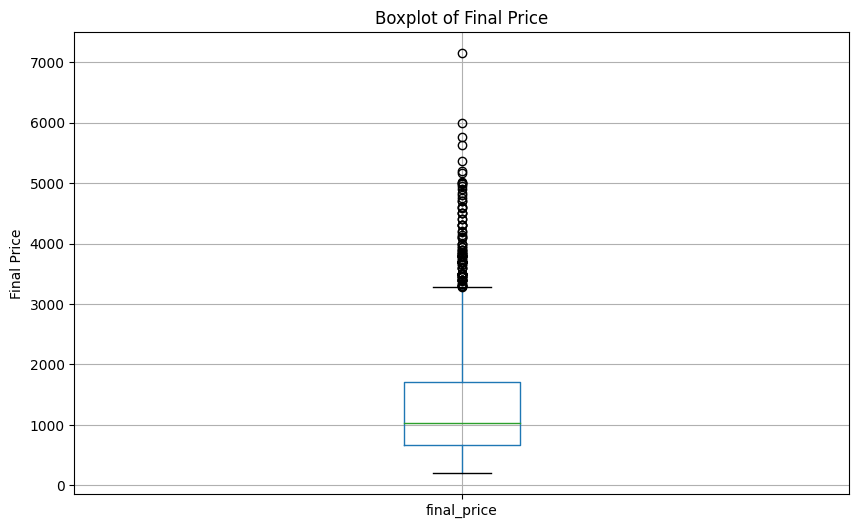

In [16]:
plt.figure(figsize=(10, 6))
new_col.boxplot(column='final_price')
plt.title('Boxplot of Final Price')
plt.ylabel('Final Price')
plt.show()

In [17]:
print(new_col['final_price'].describe())

count    2160.000000
mean     1312.638509
std       911.475417
min       201.050000
25%       661.082500
50%      1031.945000
75%      1708.970000
max      7150.470000
Name: final_price, dtype: float64


In [18]:
print(f'Skewness: {new_col["final_price"].skew()}')

Skewness: 1.6495877663192549


### Question 1
### There's one column with missing values. What is it?

In [19]:
missing_values = new_col.isnull().sum()

print("Missing values in each column:")
print(missing_values)

print("\nColumns with missing values:")

missing_columns = missing_values[missing_values > 0]
print(missing_columns)

print(f"\nTotal number of columns with missing values: {missing_columns.count()}")

if not missing_columns.empty:
    print(f"\nThe name of the column with missing values is: {missing_columns.index[0]}")

Missing values in each column:
ram            0
storage        0
screen         4
final_price    0
dtype: int64

Columns with missing values:
screen    4
dtype: int64

Total number of columns with missing values: 1

The name of the column with missing values is: screen


### Question 2
### What's the median (50% percentile) for variable 'ram'?

In [20]:
ram_median = new_col['ram'].median()

print(f"The median value for 'ram' is: {ram_median}")

The median value for 'ram' is: 16.0


### Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures.

In [21]:
def prepare_features_and_target(new_col, fillna_value, random_seed=42):
    total_rows = len(new_col)
    validation_size = test_size = int(0.2 * total_rows)
    training_size = total_rows - validation_size - test_size

    indices = np.arange(total_rows)
    np.random.seed(random_seed)
    np.random.shuffle(indices)

    new_col=(new_col.assign(screen=new_col["screen"].fillna(new_col.loc[indices[:training_size], "screen"].mean() if fillna_value == "mean" else 0)).assign())

    feature_matrix = new_col.drop(columns="final_price").values
    feature_matrix = np.column_stack([np.ones(feature_matrix.shape[0]), feature_matrix])

    target_vector = new_col["final_price"].values

    X_train, X_validation, X_test = (
        feature_matrix[indices[:training_size]],
        feature_matrix[indices[training_size:training_size + validation_size]],
        feature_matrix[indices[training_size + validation_size:]])

    y_train, y_validation, y_test = (
        target_vector[indices[:training_size]],
        target_vector[indices[training_size:training_size + validation_size]],
        target_vector[indices[training_size + validation_size:]])

    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:
With 0
With mean
Both are equally good

In [22]:
def linear_regression_model(feature_matrix, target_vector, reg_factor=0):
    identity_matrix = np.eye(feature_matrix.shape[1])
    return np.linalg.inv(feature_matrix.T @ feature_matrix + reg_factor * identity_matrix) @ feature_matrix.T @ target_vector

def calculate_rmse(target_vector, predicted):
    error = predicted - target_vector
    return np.sqrt(np.mean(error ** 2))

In [23]:
# Using fillna with 0
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_features_and_target(new_col, fillna_value=0)
weights_0 = linear_regression_model(X_train, y_train)
predicted_0 = X_validation @ weights_0
rmse_0 = round(calculate_rmse(y_validation, predicted_0), 2)
print(f"RMSE (fill with 0): {rmse_0}")

# Using fillna with mean
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_features_and_target(new_col, "mean")
weights_mean = linear_regression_model(X_train, y_train)
predicted_mean = X_validation @ weights_mean
rmse_mean = round(calculate_rmse(y_validation, predicted_mean), 2)
print(f"RMSE (fill with mean): {rmse_mean}")

if rmse_0 < rmse_mean:
    print("\nOption 1 (filling with 0) gives a better RMSE.")
elif rmse_0 > rmse_mean:
    print("\nOption 2 (filling with mean) gives a better RMSE.")
else:
    print("\nBoth options are equally good.")

RMSE (fill with 0): 597.36
RMSE (fill with mean): 600.27

Option 1 (filling with 0) gives a better RMSE.


### Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:
0
0.01
1
10
100

In [25]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_features_and_target(new_col, fillna_value=0)

best_rmse = float('inf')
best_r = None

table = PrettyTable()
table.field_names = ["Regularization Factor (r)", "RMSE"]

for r in r_values:
    weights = linear_regression_model(X_train, y_train, reg_factor=r)
    predicted = X_validation @ weights
    rmse_value = round(calculate_rmse(y_validation, predicted), 2)

    table.add_row([r, rmse_value])

    if rmse_value < best_rmse:
        best_rmse = rmse_value
        best_r = r

print(table)

print(f"\nThe optimal regularization factor is: {best_r} with an RMSE of: {best_rmse}")

+---------------------------+--------+
| Regularization Factor (r) |  RMSE  |
+---------------------------+--------+
|             0             | 597.36 |
|            0.01           | 597.36 |
|            0.1            | 597.35 |
|             1             | 597.21 |
|             5             | 597.01 |
|             10            | 597.06 |
|            100            | 597.9  |
+---------------------------+--------+

The optimal regularization factor is: 5 with an RMSE of: 597.01


### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

19.176
29.176
39.176
49.176
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [26]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_features_and_target(new_col, fillna_value=0, random_seed=seed)

    weights = linear_regression_model(X_train, y_train)

    predicted = X_validation @ weights

    rmse_value = calculate_rmse(y_validation, predicted)
    rmse_scores.append(rmse_value)
    print(f"Seed {seed}: RMSE = {round(rmse_value, 3)}")

std_rmse = np.std(rmse_scores)
print(f"\nStandard deviation of RMSE scores: {round(std_rmse, 3)}")

Seed 0: RMSE = 565.452
Seed 1: RMSE = 636.799
Seed 2: RMSE = 588.956
Seed 3: RMSE = 597.815
Seed 4: RMSE = 571.963
Seed 5: RMSE = 573.238
Seed 6: RMSE = 647.344
Seed 7: RMSE = 550.44
Seed 8: RMSE = 587.334
Seed 9: RMSE = 576.102

Standard deviation of RMSE scores: 29.176


### Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

Options:
598.60
608.60
618.60
628.60

In [27]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_features_and_target(new_col, fillna_value=0, random_seed=9)

X_combined = np.vstack((X_train, X_validation))
y_combined = np.concatenate((y_train, y_validation))

weights_combined = linear_regression_model(X_combined, y_combined, reg_factor=0.001)

predicted_test = X_test @ weights_combined

rmse_test = round(calculate_rmse(y_test, predicted_test), 2)

print("\n=============================")
print("          RMSE Calculation   ")
print("=============================")
print(f"Using seed: 9 for splitting the dataset.")
print(f"Combined training and validation datasets.")
print(f"Filled missing values with 0.")
print(f"Trained the model with a regularization factor (r) of: 0.001.")
print(f"RMSE on the test dataset: {rmse_test}")


          RMSE Calculation   
Using seed: 9 for splitting the dataset.
Combined training and validation datasets.
Filled missing values with 0.
Trained the model with a regularization factor (r) of: 0.001.
RMSE on the test dataset: 608.61


### SUMMARY

In [28]:
rmse_fill_0 = 597.36
rmse_fill_mean = 600.27
optimal_reg_factor = 5
optimal_rmse = 597.01

regularization_results = {
    0: 597.36,
    0.01: 597.36,
    0.1: 597.35,
    1: 597.21,
    5: 597.01,
    10: 597.06,
    100: 597.90}

seed_rmse = {
    0: 565.452,
    1: 636.799,
    2: 588.956,
    3: 597.815,
    4: 571.963,
    5: 573.238,
    6: 647.344,
    7: 550.440,
    8: 587.334,
    9: 576.102}

final_test_rmse = 608.61

summary_table = PrettyTable()
summary_table.field_names = ["Description", "Value"]

summary_table.add_row(["RMSE (fill with 0)", rmse_fill_0])
summary_table.add_row(["RMSE (fill with mean)", rmse_fill_mean])
summary_table.add_row(["Better Option", "Option 1 (filling with 0)"])
summary_table.add_row(["Optimal Regularization Factor", optimal_reg_factor])
summary_table.add_row(["Optimal RMSE (with r = 5)", optimal_rmse])
summary_table.add_row(["Standard Deviation of RMSE Scores", std_rmse])
summary_table.add_row(["RMSE on Test Dataset", final_test_rmse])

reg_table = PrettyTable()
reg_table.field_names = ["Regularization Factor (r)", "RMSE"]

for r, rmse in regularization_results.items():
    reg_table.add_row([r, rmse])

seed_table = PrettyTable()
seed_table.field_names = ["Seed", "RMSE"]

for seed, rmse in seed_rmse.items():
    seed_table.add_row([seed, rmse])

print("===== Summary of RMSE Results =====")
print(summary_table)
print("\n===== RMSE for Regularization Factors =====")
print(reg_table)
print("\n===== RMSE for Different Seeds =====")
print(seed_table)

===== Summary of RMSE Results =====
+-----------------------------------+---------------------------+
|            Description            |           Value           |
+-----------------------------------+---------------------------+
|         RMSE (fill with 0)        |           597.36          |
|       RMSE (fill with mean)       |           600.27          |
|           Better Option           | Option 1 (filling with 0) |
|   Optimal Regularization Factor   |             5             |
|     Optimal RMSE (with r = 5)     |           597.01          |
| Standard Deviation of RMSE Scores |     29.176491258292764    |
|        RMSE on Test Dataset       |           608.61          |
+-----------------------------------+---------------------------+

===== RMSE for Regularization Factors =====
+---------------------------+--------+
| Regularization Factor (r) |  RMSE  |
+---------------------------+--------+
|             0             | 597.36 |
|            0.01           | 597.36 